# GDelt data preprocessing

This is to bring the GDelt data into a time series in forecasting ready format.


In [ ]:
# Add the repo to the python paths if not yet existing there - for the data_engineering input
import sys
import os

repo_path = os.getcwd().split('project_submission_haiperformer')[0] + 'project_submission_haiperformer'
sys.path.append(repo_path) if repo_path not in sys.path else None

In [1]:
import pandas as pd
from data_engineering.src.util.preprocessing_helpers import create_weekly_time_series

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\janhe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv(
    "../../data_collection/gdelt_5k_per_year_raw_data.csv", low_memory=False
)
df.head(10000)

,DATEADDED,EventCode,Actor1Code,Actor1CountryCode,Unnamed: 4,Actor2Code,Unnamed: 6,Actor2CountryCode,NumArticles,Goldstein_Scale,AvgTone
0,19790101,51,NaN,GOV,NaN,NaN,NaN,FRA,4,3.4,NaN
1,19790101,10,NaN,GOV,NaN,NaN,NaN,FRA,4,0.0,NaN
2,19790101,46,NaN,CAF,NaN,NaN,NaN,COD,3,7.0,NaN
3,19790101,46,NaN,COD,NaN,NaN,NaN,CAF,3,7.0,NaN
4,19790101,51,NaN,FRA,NaN,NaN,NaN,GAB,3,3.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,19801231,190,NaN,SYR,NaN,NaN,NaN,ISR,4,-10.0,NaN
9996,19801231,841,NaN,USA,NaN,NaN,NaN,IRN,3,7.0,NaN
9997,19801231,20,NaN,USA,NaN,NaN,NaN,IRN,3,3.0,NaN
9998,19801231,80,NaN,IRN,NaN,NaN,NaN,USA,3,5.0,NaN


In [3]:
df["DATEADDED"].describe()

count    2.180210e+05
mean     2.000391e+07
std      1.262918e+05
min      1.979010e+07
25%      1.989112e+07
50%      2.000100e+07
75%      2.011080e+07
max      2.023060e+07
Name: DATEADDED, dtype: float64

In [4]:
max(df["DATEADDED"])

20230605

In [5]:
# weekly_data = create_weekly_time_series(df, format='%Y%m%d%H%M%S') # Use this for events_9_years_decoded
weekly_data = create_weekly_time_series(
    df, format="%Y%m%d"
)  # Use this for 5k_per_year_final

In [6]:
weekly_data

EventCode,10,11,12,13,14,15,16,17,18,19,...,1712,1721,1722,1723,1724,1821,1822,1823,1831,1832
DATEADDED,,,,,,,,,,,,,,,,,,,,,
1979-01-01,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-08,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-15,15.0,NaN,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-22,21.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-29,8.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,782.0,NaN,NaN,420.0,510.0,NaN,NaN,824.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN
2023-05-15,1539.0,NaN,NaN,271.0,154.0,NaN,130.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-22,1806.0,NaN,130.0,467.0,NaN,NaN,NaN,328.0,180.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove the name of the index - Requested by David for the modelling
weekly_data.index.name = ""

# Export data
weekly_data.to_csv("../timeseries_data/ts_gdelt_5k_per_year_data.csv", index=True)

## Visualization of the GDELT time series

To detect potential data quality issues with the GDelt data as early and as easy as possible, we visualize them.


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

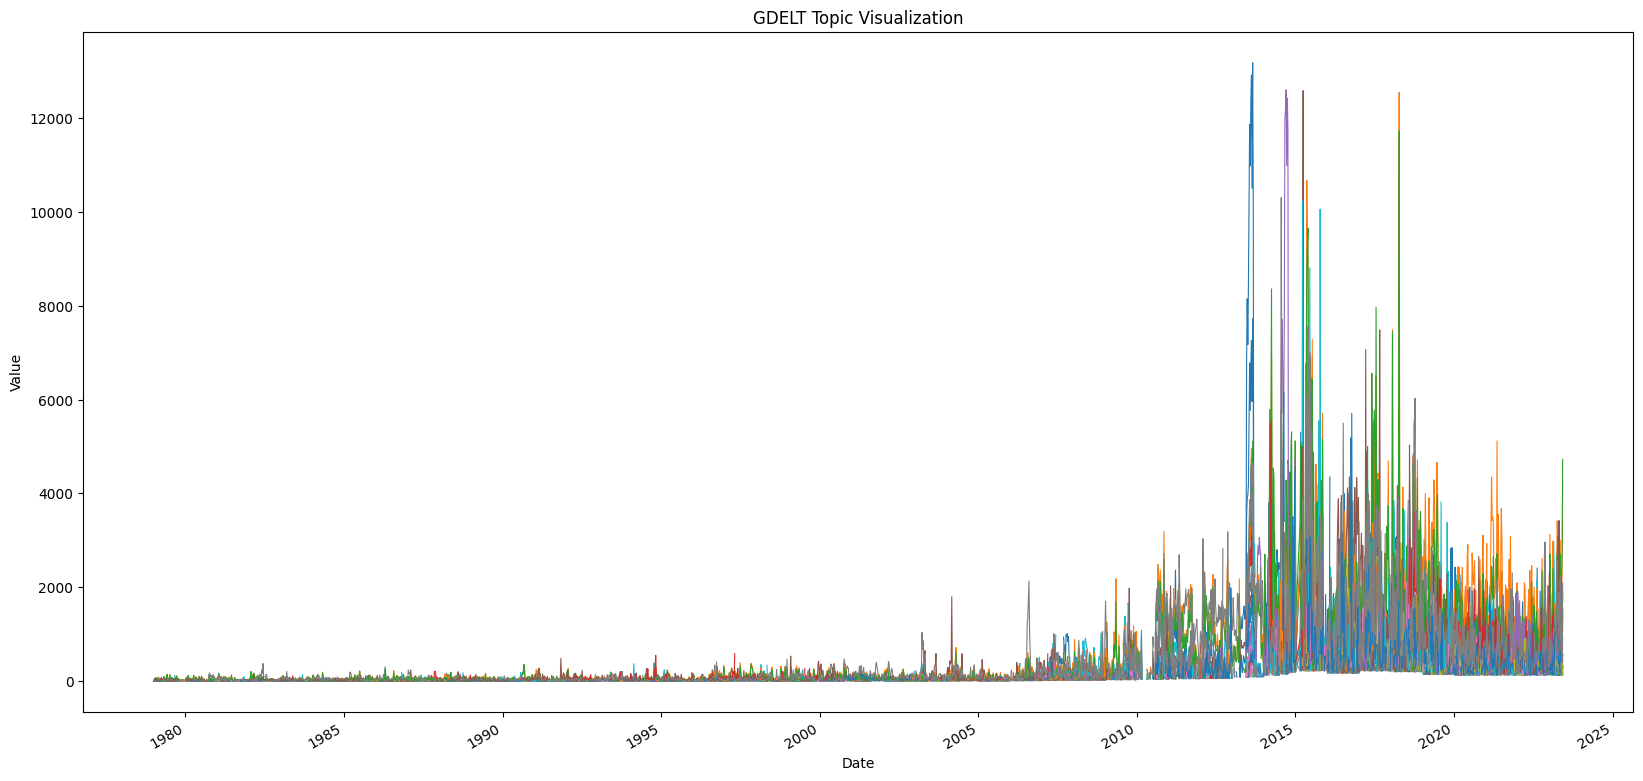

In [20]:
plt.rcParams["figure.figsize"] = [20, 10]
weekly_data.plot(lw=0.8)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("GDELT Topic Visualization")
plt.legend().remove()
plt.show()

## More detailed analysis

As the average topic intensity seems to vary over time, more detailed analysis is needed


<Figure size 3200x2000 with 0 Axes>

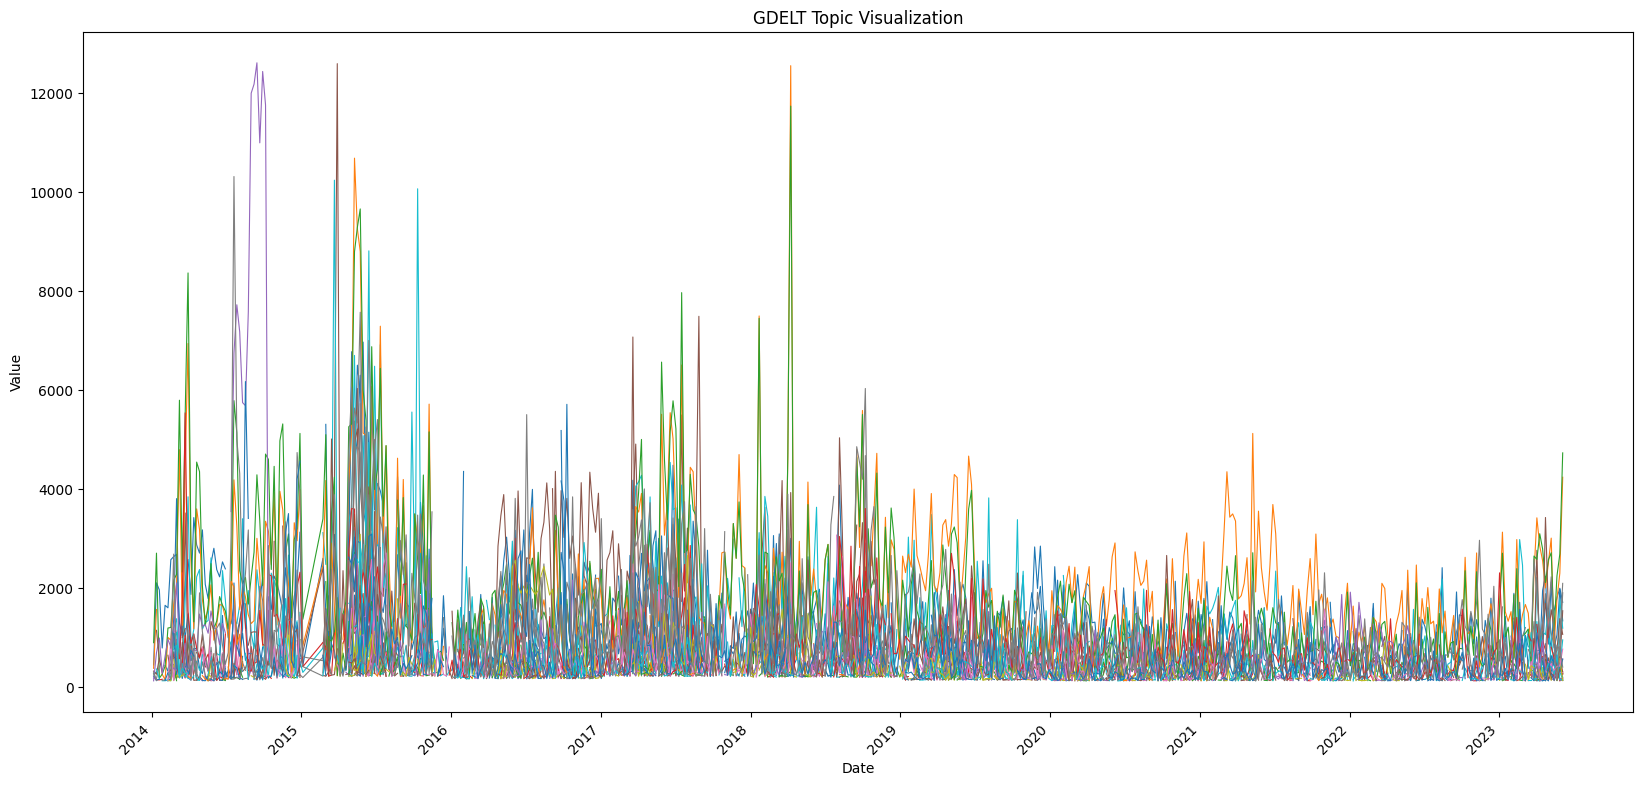

In [21]:
filtered_data = weekly_data.loc["2014":]
plt.figure(figsize=(32, 20))

# Plotting all time series in the DataFrame
filtered_data.plot(lw=0.8)  # Adjust line width
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("GDELT Topic Visualization")
plt.xticks(rotation=45)
plt.legend().remove()  # Remove the legend
plt.show()